In [1]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")


In [11]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
import time
import h5py
import PIL
import pandas as pd
from tensorflow.keras.layers import *
from tensorflow.keras.layers import Dense,MaxPool2D,Conv2D,Conv2DTranspose,Conv2D,Conv2DTranspose,BatchNormalization,Input,ReLU,Add,Lambda,LeakyReLU,Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow import Tensor
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.utils import Sequence
import random

from importlib import reload 
from monk import Dataset
   
from PIL import Image 
import PIL 
  
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

from sklearn.metrics import classification_report
import pandas as pd
import cv2

In [3]:
import ncut_loss
import build_Unet
import build_Wnet
import getData


In [4]:
from datasets import get_damaged_generator
from datasets import get_non_damaged_generator
from datasets import get_mixed_generator
import seaborn as sns
import pandas as pd

In [31]:
import json

In [37]:
from monk.utils.s3.s3path import S3Path

In [69]:
im =PIL.Image.open(s3.download())

ClientError: An error occurred (404) when calling the HeadObject operation: Not Found

In [94]:
with open("/home/ubuntu/shared/perso/nicolas/Projets/Classifieur_idea/idea_data_train/door_batch_0.json") as f:
    data = json.load(f)

In [95]:
data[2]

{'path': 's3:/monk-client-images/idea-expert/images/ideabi/130017369/ideabi_130017369_07BFE859_802.jpg',
 'bbox_xyxy': [1048.857177734375,
  165.4188690185547,
  1203.2257080078125,
  516.9339599609375],
 'image_size': [1522, 856],
 'label': 'door_back_left',
 'source': None,
 'inspection_id': None,
 'origin': None,
 'method': None,
 'diagonal_relative_to_image': 0.21985852010493787,
 'part': 'door_back_left',
 'part_grouped': 'door',
 'repair_action': 'not_damaged',
 'inclusion_part': None,
 'iou_part': None,
 'mapping_used': None,
 'part_bbox': [1048.857177734375,
  165.4188690185547,
  1203.2257080078125,
  516.9339599609375]}

In [180]:
k=10238


bucket = "monk-client-images"
key = data[k]["path"].replace("s3:/monk-client-images/","")
s3 = S3Path(bucket,key)
im = PIL.Image.open(s3.download())

#path = data[k]["path"]
#im = PIL.Image.open(path)

bbox =  data[k]["part_bbox"]

#im1 = im.crop((left, top, right, bottom))

print(data[k]["repair_action"])

im_crop = im.crop(bbox)

D


In [181]:
bbox

[0.0, 0.0, 1917.2572021484375, 1077.2589111328125]

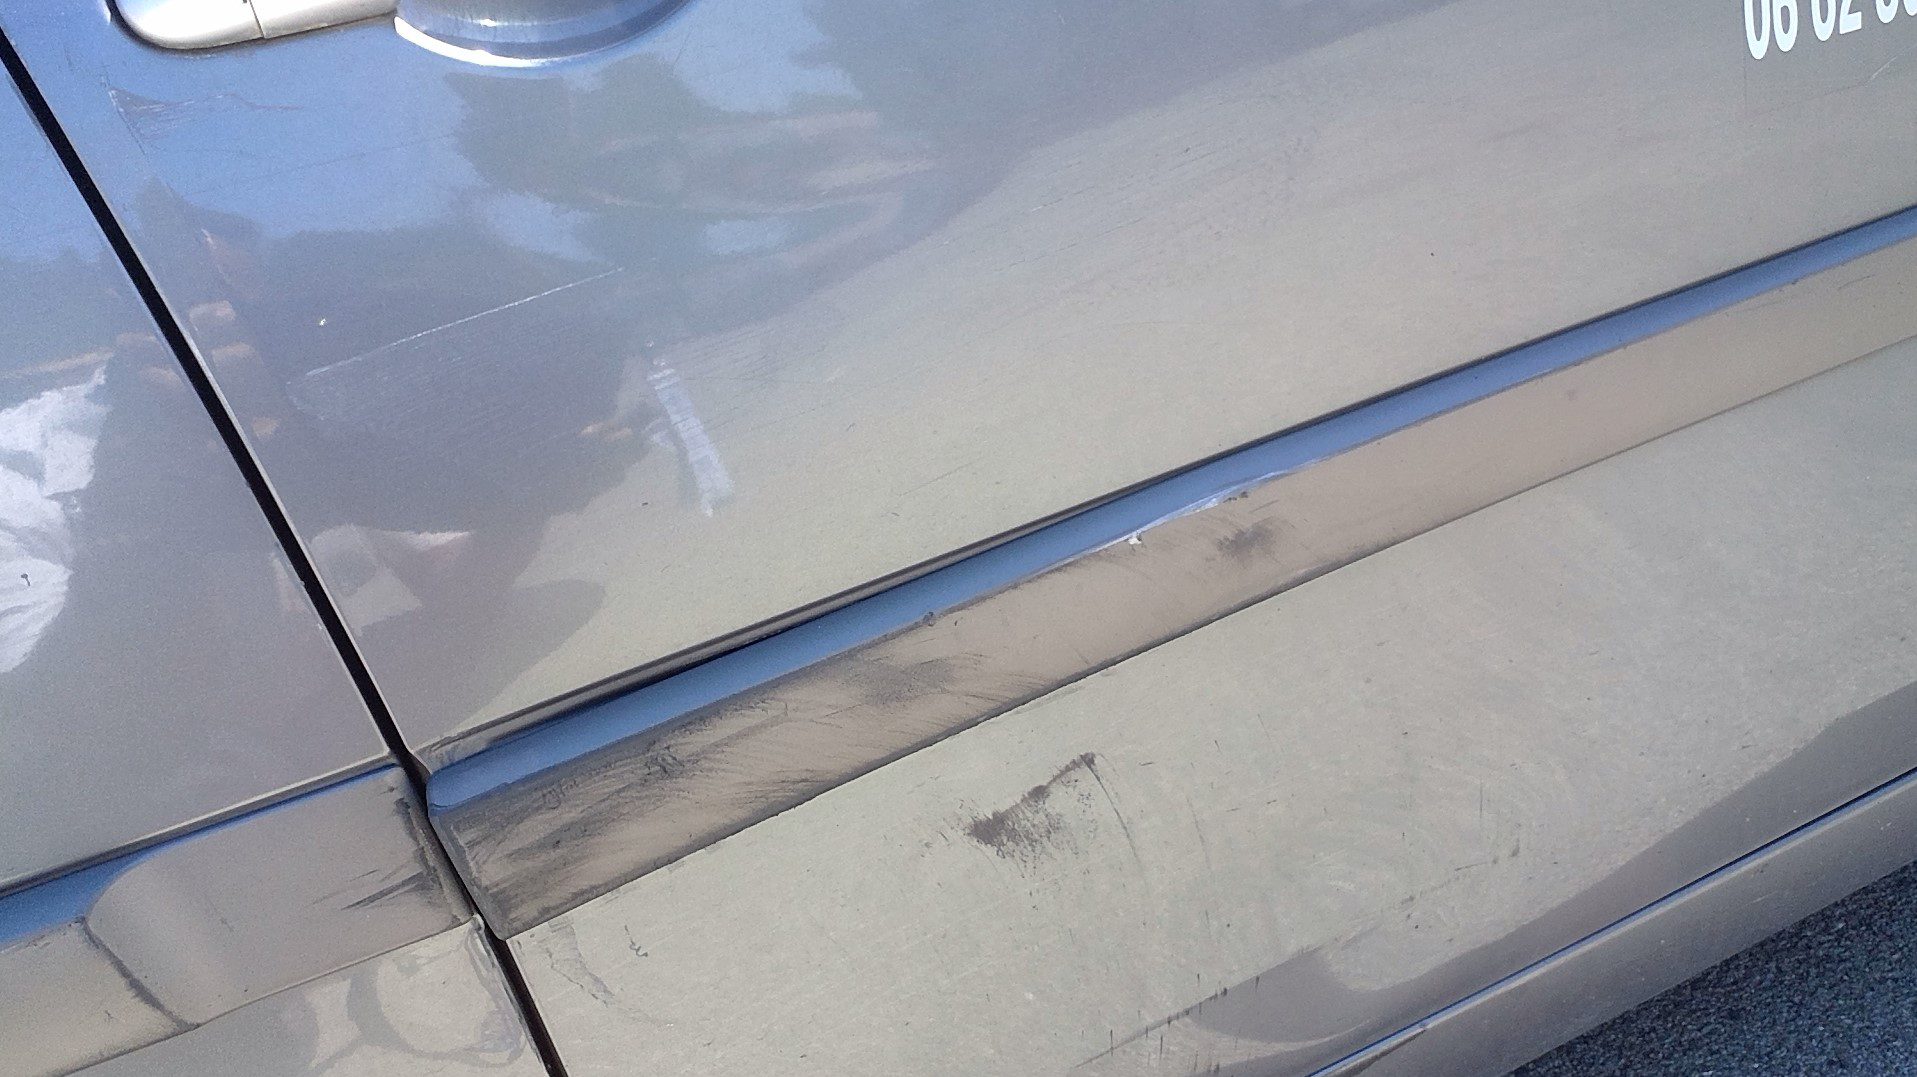

In [182]:
im_crop

In [194]:
not_damaged_door =[]
for i in range(0,len(data)):
    if data[i]["repair_action"]=='not_damaged' and "s3:/monk-client-images/" in data[i]["path"]:
        not_damaged_door.append(data[i])
        

In [195]:
len(not_damaged_door)

15324

In [196]:
for i in range(0,len(not_damaged_door)):
    print(i)
    print(not_damaged_door[i]["path"])

0
s3:/monk-client-images/idea-expert/images/ideabi/130017369/ideabi_130017369_07BFE859_801.jpg
1
s3:/monk-client-images/idea-expert/images/ideabi/130017369/ideabi_130017369_07BFE859_801.jpg
2
s3:/monk-client-images/idea-expert/images/ideabi/130017369/ideabi_130017369_07BFE859_802.jpg
3
s3:/monk-client-images/idea-expert/images/ideabi/130017369/ideabi_130017369_07BFE859_802.jpg
4
s3:/monk-client-images/idea-expert/images/ideabi/130017370/ideabi_130017370_07BFE85A_801.jpg
5
s3:/monk-client-images/idea-expert/images/ideabi/130017370/ideabi_130017370_07BFE85A_801.jpg
6
s3:/monk-client-images/idea-expert/images/ideabi/130017370/ideabi_130017370_07BFE85A_802.jpg
7
s3:/monk-client-images/idea-expert/images/ideabi/130017370/ideabi_130017370_07BFE85A_802.jpg
8
s3:/monk-client-images/idea-expert/images/ideabi/130017370/ideabi_130017370_07BFE85A_806.jpg
9
s3:/monk-client-images/idea-expert/images/ideabi/130017373/ideabi_130017373_07BFE85D_805.jpg
10
s3:/monk-client-images/idea-expert/images/ideab

s3:/monk-client-images/idea-expert/images/ideabi/130019415/ideabi_130019415_07BFF057_80D.jpg
1244
s3:/monk-client-images/idea-expert/images/ideabi/130019422/ideabi_130019422_07BFF05E_806.jpg
1245
s3:/monk-client-images/idea-expert/images/ideabi/130019423/ideabi_130019423_07BFF05F_80A.jpg
1246
s3:/monk-client-images/idea-expert/images/ideabi/130019426/ideabi_130019426_07BFF062_802.jpg
1247
s3:/monk-client-images/idea-expert/images/ideabi/130019426/ideabi_130019426_07BFF062_803.jpg
1248
s3:/monk-client-images/idea-expert/images/ideabi/130019426/ideabi_130019426_07BFF062_809.jpg
1249
s3:/monk-client-images/idea-expert/images/ideabi/130019426/ideabi_130019426_07BFF062_812.jpg
1250
s3:/monk-client-images/idea-expert/images/ideabi/130019426/ideabi_130019426_07BFF062_812.jpg
1251
s3:/monk-client-images/idea-expert/images/ideabi/130019429/ideabi_130019429_07BFF065_804.jpg
1252
s3:/monk-client-images/idea-expert/images/ideabi/130019437/ideabi_130019437_07BFF06D_801.jpg
1253
s3:/monk-client-imag

2464
s3:/monk-client-images/idea-expert/images/viennesbi/382000131/viennesbi_382000131_16C4DC03_812.jpg
2465
s3:/monk-client-images/idea-expert/images/viennesbi/382000131/viennesbi_382000131_16C4DC03_81C.jpg
2466
s3:/monk-client-images/idea-expert/images/viennesbi/382000131/viennesbi_382000131_16C4DC03_81C.jpg
2467
s3:/monk-client-images/idea-expert/images/viennesbi/382000131/viennesbi_382000131_16C4DC03_81E.jpg
2468
s3:/monk-client-images/idea-expert/images/viennesbi/382000131/viennesbi_382000131_16C4DC03_81E.jpg
2469
s3:/monk-client-images/idea-expert/images/viennesbi/382000131/viennesbi_382000131_16C4DC03_821.jpg
2470
s3:/monk-client-images/idea-expert/images/viennesbi/382000131/viennesbi_382000131_16C4DC03_821.jpg
2471
s3:/monk-client-images/idea-expert/images/viennesbi/382000133/viennesbi_382000133_16C4DC05_802.jpg
2472
s3:/monk-client-images/idea-expert/images/viennesbi/382000133/viennesbi_382000133_16C4DC05_807.jpg
2473
s3:/monk-client-images/idea-expert/images/viennesbi/3820001

3692
s3:/monk-client-images/idea-expert/images/viennesbi/382001555/viennesbi_382001555_16C4E193_803.jpg
3693
s3:/monk-client-images/idea-expert/images/viennesbi/382001555/viennesbi_382001555_16C4E193_806.jpg
3694
s3:/monk-client-images/idea-expert/images/viennesbi/382001555/viennesbi_382001555_16C4E193_806.jpg
3695
s3:/monk-client-images/idea-expert/images/viennesbi/382001556/viennesbi_382001556_16C4E194_803.jpg
3696
s3:/monk-client-images/idea-expert/images/viennesbi/382001556/viennesbi_382001556_16C4E194_804.jpg
3697
s3:/monk-client-images/idea-expert/images/viennesbi/382001557/viennesbi_382001557_16C4E195_801.jpg
3698
s3:/monk-client-images/idea-expert/images/viennesbi/382001557/viennesbi_382001557_16C4E195_801.jpg
3699
s3:/monk-client-images/idea-expert/images/viennesbi/382001557/viennesbi_382001557_16C4E195_802.jpg
3700
s3:/monk-client-images/idea-expert/images/viennesbi/382001557/viennesbi_382001557_16C4E195_804.jpg
3701
s3:/monk-client-images/idea-expert/images/viennesbi/3820015

s3:/monk-client-images/idea-expert/images/viennesbi/430102551/viennesbi_430102551_19A2D817_807.jpg
4975
s3:/monk-client-images/idea-expert/images/viennesbi/430102561/viennesbi_430102561_19A2D821_802.jpg
4976
s3:/monk-client-images/idea-expert/images/viennesbi/430102561/viennesbi_430102561_19A2D821_802.jpg
4977
s3:/monk-client-images/idea-expert/images/viennesbi/430102561/viennesbi_430102561_19A2D821_803.jpg
4978
s3:/monk-client-images/idea-expert/images/viennesbi/430102561/viennesbi_430102561_19A2D821_803.jpg
4979
s3:/monk-client-images/idea-expert/images/viennesbi/430102561/viennesbi_430102561_19A2D821_805.jpg
4980
s3:/monk-client-images/idea-expert/images/viennesbi/430102561/viennesbi_430102561_19A2D821_805.jpg
4981
s3:/monk-client-images/idea-expert/images/viennesbi/430102561/viennesbi_430102561_19A2D821_806.jpg
4982
s3:/monk-client-images/idea-expert/images/viennesbi/430102564/viennesbi_430102564_19A2D824_804.jpg
4983
s3:/monk-client-images/idea-expert/images/viennesbi/430102564/vi

6240
s3:/monk-client-images/idea-expert/images/viennesbi/430103593/viennesbi_430103593_19A2DC29_824.jpg
6241
s3:/monk-client-images/idea-expert/images/viennesbi/430103594/viennesbi_430103594_19A2DC2A_801.jpg
6242
s3:/monk-client-images/idea-expert/images/viennesbi/430103594/viennesbi_430103594_19A2DC2A_803.jpg
6243
s3:/monk-client-images/idea-expert/images/viennesbi/430103594/viennesbi_430103594_19A2DC2A_804.jpg
6244
s3:/monk-client-images/idea-expert/images/viennesbi/430103594/viennesbi_430103594_19A2DC2A_804.jpg
6245
s3:/monk-client-images/idea-expert/images/viennesbi/430103594/viennesbi_430103594_19A2DC2A_80F.jpg
6246
s3:/monk-client-images/idea-expert/images/viennesbi/430103601/viennesbi_430103601_19A2DC31_802.jpg
6247
s3:/monk-client-images/idea-expert/images/viennesbi/430103601/viennesbi_430103601_19A2DC31_802.jpg
6248
s3:/monk-client-images/idea-expert/images/viennesbi/430103601/viennesbi_430103601_19A2DC31_803.jpg
6249
s3:/monk-client-images/idea-expert/images/viennesbi/4301036

7513
s3:/monk-client-images/idea-expert/images/bmebi/200014040/bmebi_200014040_0BEBF8D8_809.jpg
7514
s3:/monk-client-images/idea-expert/images/bmebi/200014042/bmebi_200014042_0BEBF8DA_804.jpg
7515
s3:/monk-client-images/idea-expert/images/bmebi/200014042/bmebi_200014042_0BEBF8DA_80A.jpg
7516
s3:/monk-client-images/idea-expert/images/bmebi/200014058/bmebi_200014058_0BEBF8EA_814.jpg
7517
s3:/monk-client-images/idea-expert/images/bmebi/200014067/bmebi_200014067_0BEBF8F3_802.jpg
7518
s3:/monk-client-images/idea-expert/images/bmebi/200014067/bmebi_200014067_0BEBF8F3_803.jpg
7519
s3:/monk-client-images/idea-expert/images/bmebi/200014067/bmebi_200014067_0BEBF8F3_804.jpg
7520
s3:/monk-client-images/idea-expert/images/bmebi/200014067/bmebi_200014067_0BEBF8F3_805.jpg
7521
s3:/monk-client-images/idea-expert/images/bmebi/200014067/bmebi_200014067_0BEBF8F3_805.jpg
7522
s3:/monk-client-images/idea-expert/images/bmebi/200014073/bmebi_200014073_0BEBF8F9_803.jpg
7523
s3:/monk-client-images/idea-expert/

8783
s3:/monk-client-images/idea-expert/images/bmebi/200017971/bmebi_200017971_0BEC0833_805.jpg
8784
s3:/monk-client-images/idea-expert/images/bmebi/200017971/bmebi_200017971_0BEC0833_805.jpg
8785
s3:/monk-client-images/idea-expert/images/bmebi/200017971/bmebi_200017971_0BEC0833_80C.jpg
8786
s3:/monk-client-images/idea-expert/images/bmebi/200017971/bmebi_200017971_0BEC0833_80D.jpg
8787
s3:/monk-client-images/idea-expert/images/bmebi/200017976/bmebi_200017976_0BEC0838_808.jpg
8788
s3:/monk-client-images/idea-expert/images/bmebi/200017976/bmebi_200017976_0BEC0838_809.jpg
8789
s3:/monk-client-images/idea-expert/images/bmebi/200017976/bmebi_200017976_0BEC0838_80A.jpg
8790
s3:/monk-client-images/idea-expert/images/bmebi/200017976/bmebi_200017976_0BEC0838_80A.jpg
8791
s3:/monk-client-images/idea-expert/images/bmebi/200017976/bmebi_200017976_0BEC0838_80E.jpg
8792
s3:/monk-client-images/idea-expert/images/bmebi/200018017/bmebi_200018017_0BEC0861_803.jpg
8793
s3:/monk-client-images/idea-expert/

10071
s3:/monk-client-images/idea-expert/images/ideabi/300001360/ideabi_300001360_11E1A850_806.jpg
10072
s3:/monk-client-images/idea-expert/images/ideabi/300001360/ideabi_300001360_11E1A850_808.jpg
10073
s3:/monk-client-images/idea-expert/images/ideabi/300001360/ideabi_300001360_11E1A850_80A.jpg
10074
s3:/monk-client-images/idea-expert/images/ideabi/300001360/ideabi_300001360_11E1A850_80C.jpg
10075
s3:/monk-client-images/idea-expert/images/ideabi/300001360/ideabi_300001360_11E1A850_80E.jpg
10076
s3:/monk-client-images/idea-expert/images/ideabi/300001360/ideabi_300001360_11E1A850_816.jpg
10077
s3:/monk-client-images/idea-expert/images/ideabi/300001360/ideabi_300001360_11E1A850_816.jpg
10078
s3:/monk-client-images/idea-expert/images/ideabi/300001391/ideabi_300001391_11E1A86F_806.jpg
10079
s3:/monk-client-images/idea-expert/images/ideabi/300001391/ideabi_300001391_11E1A86F_806.jpg
10080
s3:/monk-client-images/idea-expert/images/ideabi/300001395/ideabi_300001395_11E1A873_806.jpg
10081
s3:/

s3:/monk-client-images/idea-expert/images/ideabi/260061940/ideabi_260061940_0F803AF4_81B.jpg
11285
s3:/monk-client-images/idea-expert/images/ideabi/260061942/ideabi_260061942_0F803AF6_812.jpg
11286
s3:/monk-client-images/idea-expert/images/ideabi/260061945/ideabi_260061945_0F803AF9_804.jpg
11287
s3:/monk-client-images/idea-expert/images/ideabi/260061945/ideabi_260061945_0F803AF9_805.jpg
11288
s3:/monk-client-images/idea-expert/images/ideabi/260061945/ideabi_260061945_0F803AF9_807.jpg
11289
s3:/monk-client-images/idea-expert/images/ideabi/260061945/ideabi_260061945_0F803AF9_809.jpg
11290
s3:/monk-client-images/idea-expert/images/ideabi/260061945/ideabi_260061945_0F803AF9_809.jpg
11291
s3:/monk-client-images/idea-expert/images/ideabi/260061945/ideabi_260061945_0F803AF9_80A.jpg
11292
s3:/monk-client-images/idea-expert/images/ideabi/260061945/ideabi_260061945_0F803AF9_80A.jpg
11293
s3:/monk-client-images/idea-expert/images/ideabi/260061946/ideabi_260061946_0F803AFA_802.jpg
11294
s3:/monk-c

s3:/monk-client-images/idea-expert/images/ideabi/260063010/ideabi_260063010_0F803F22_805.jpg
12502
s3:/monk-client-images/idea-expert/images/ideabi/260063010/ideabi_260063010_0F803F22_805.jpg
12503
s3:/monk-client-images/idea-expert/images/ideabi/260063010/ideabi_260063010_0F803F22_80B.jpg
12504
s3:/monk-client-images/idea-expert/images/ideabi/260063013/ideabi_260063013_0F803F25_803.jpg
12505
s3:/monk-client-images/idea-expert/images/ideabi/260063013/ideabi_260063013_0F803F25_803.jpg
12506
s3:/monk-client-images/idea-expert/images/ideabi/260063013/ideabi_260063013_0F803F25_805.jpg
12507
s3:/monk-client-images/idea-expert/images/ideabi/260063013/ideabi_260063013_0F803F25_808.jpg
12508
s3:/monk-client-images/idea-expert/images/ideabi/260063013/ideabi_260063013_0F803F25_808.jpg
12509
s3:/monk-client-images/idea-expert/images/ideabi/260063013/ideabi_260063013_0F803F25_809.jpg
12510
s3:/monk-client-images/idea-expert/images/ideabi/260063018/ideabi_260063018_0F803F2A_801.jpg
12511
s3:/monk-c

s3:/monk-client-images/idea-expert/images/ideabi/260064385/ideabi_260064385_0F804481_809.jpg
13720
s3:/monk-client-images/idea-expert/images/ideabi/260064385/ideabi_260064385_0F804481_80A.jpg
13721
s3:/monk-client-images/idea-expert/images/ideabi/260064385/ideabi_260064385_0F804481_80A.jpg
13722
s3:/monk-client-images/idea-expert/images/ideabi/260064385/ideabi_260064385_0F804481_80C.jpg
13723
s3:/monk-client-images/idea-expert/images/ideabi/260064385/ideabi_260064385_0F804481_80C.jpg
13724
s3:/monk-client-images/idea-expert/images/ideabi/260064385/ideabi_260064385_0F804481_80E.jpg
13725
s3:/monk-client-images/idea-expert/images/ideabi/260064385/ideabi_260064385_0F804481_812.jpg
13726
s3:/monk-client-images/idea-expert/images/ideabi/260064385/ideabi_260064385_0F804481_814.jpg
13727
s3:/monk-client-images/idea-expert/images/ideabi/260064385/ideabi_260064385_0F804481_814.jpg
13728
s3:/monk-client-images/idea-expert/images/ideabi/260064386/ideabi_260064386_0F804482_804.jpg
13729
s3:/monk-c

s3:/monk-client-images/idea-expert/images/ideabi/260065710/ideabi_260065710_0F8049AE_807.jpg
14932
s3:/monk-client-images/idea-expert/images/ideabi/260065710/ideabi_260065710_0F8049AE_808.jpg
14933
s3:/monk-client-images/idea-expert/images/ideabi/260065710/ideabi_260065710_0F8049AE_808.jpg
14934
s3:/monk-client-images/idea-expert/images/ideabi/260065725/ideabi_260065725_0F8049BD_807.jpg
14935
s3:/monk-client-images/idea-expert/images/ideabi/260065725/ideabi_260065725_0F8049BD_808.jpg
14936
s3:/monk-client-images/idea-expert/images/ideabi/260065725/ideabi_260065725_0F8049BD_808.jpg
14937
s3:/monk-client-images/idea-expert/images/ideabi/260065725/ideabi_260065725_0F8049BD_80A.jpg
14938
s3:/monk-client-images/idea-expert/images/ideabi/260065725/ideabi_260065725_0F8049BD_80A.jpg
14939
s3:/monk-client-images/idea-expert/images/ideabi/260065725/ideabi_260065725_0F8049BD_80C.jpg
14940
s3:/monk-client-images/idea-expert/images/ideabi/260065725/ideabi_260065725_0F8049BD_80D.jpg
14941
s3:/monk-c

In [331]:
class DataGenerator(tf.keras.utils.Sequence):
    
    def __init__(self,json_paths, batch_size=10, dim=(128,128), n_channels=3,shuffle=True,damaged=False):
        
        
        
        self.shuffle = shuffle 
        self.dim = dim 
        self.batch_size = batch_size  
        self.n_channels = n_channels
        self.damaged=damaged
        
        jsons_data=[]
        
        for json_path in json_paths:
            with open(json_path) as f:
                json_data = json.load(f)
            jsons_data.append(json_data)
            
        self.filter_json(jsons_data,damaged)

        
        
    def filter_json(self,jsons_data,damaged):
        
        
        filtered_json =[]

        for json_data in jsons_data :
        
            for i in range(0,len(json_data)):
                
                
                if json_data[i]["repair_action"]=='not_damaged' and damaged==False :
                    filtered_json.append(json_data[i])
                elif json_data[i]["repair_action"]!='not_damaged' and json_data[i]["repair_action"]!=None and damaged==True and (json_data[i]["label"]=='scratch' or json_data[i]["label"]=='dent' ) :
                    filtered_json.append(json_data[i])
               
        
        self.filtered_json=filtered_json
        self.list_IDs = np.arange(len(filtered_json)) 
        self.indexes = np.arange(len(filtered_json))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)
        

    
    def load_image(self,id):
        
        data = self.filtered_json[id]
        
        
        if('s3:/monk-client-images/' in data["path"]):
            bucket = "monk-client-images"
            key = data["path"].replace("s3:/monk-client-images/","")
            s3 = S3Path(bucket,key)
            im = PIL.Image.open(s3.download())
        else:
            im = PIL.Image.open(data["path"])
        
        bbox =  data["part_bbox"]
        img_crop = im.crop(bbox)
        img_crop = img_crop.resize(self.dim)
        
        return(np.array(img_crop))
        
    def __len__(self):
       
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
    
        
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X = self.__data_generation(list_IDs_temp)

        return X

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.empty((self.batch_size, *self.dim, self.n_channels),dtype=int)
        #y = np.empty((self.batch_size), dtype=int)

        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            # Store sample
            X[i,] = self.load_image(self.indexes[ID])

            # Store class
            #y[i] = self.labels[ID]

        #return X, keras.utils.to_categorical(y, num_classes=self.n_classes)
        return X

In [336]:
json_path= ["/home/ubuntu/shared/perso/nicolas/Projets/Classifieur_idea/idea_data_train/door_batch_0.json","/home/ubuntu/shared/perso/nicolas/Projets/Classifieur_idea/idea_data_train/door_batch_1.json"]
gen = DataGenerator(json_path, batch_size=10, dim=(256,256), n_channels=3,shuffle=True,damaged=False)

In [338]:
im = gen.__getitem__(5)

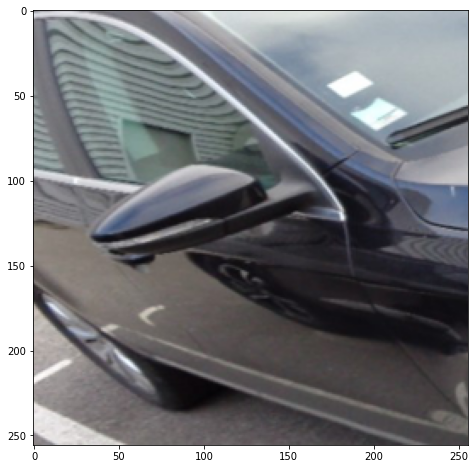

In [339]:
plt.figure(figsize=(8,8))
plt.imshow(im[1])

In [335]:
len(gen)

4009

In [337]:
len(gen)

4757